## Deep Learning

In [1]:
import pandas as pd
import numpy as np
import torch
from torch import nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error
from scipy.stats import pearsonr, spearmanr
from tqdm import tqdm
import random
from biopandas.pdb import PandasPdb
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
github_location = "https://github.com/enveda/modbioterp-enveda/raw/refs/heads/main"
#data_folder = "content"
data_folder = "/home/antonio.gomes/modbioterp-enveda/workshop_data"
PDB_FILE_LOCATION = f"{github_location}/workshop_data/cotb2_pp_mg.pdb"
#!wget $PDB_FILE_LOCATION -O /content/cotb2_pp_mg.pdb
RANDOM_SEED = 42
random.seed(RANDOM_SEED)
np.random.seed(RANDOM_SEED)

In [3]:
pdb_file = PandasPdb().read_pdb(f"{data_folder}/cotb2_pp_mg.pdb")
protein_coordinates_df = pdb_file.df["ATOM"][["x_coord", "y_coord", "z_coord", "atom_name", "residue_name"]]
protein_coordinates_df = pd.get_dummies(protein_coordinates_df, columns = ["atom_name", "residue_name"]).astype(float)

In [4]:
energies = f"{github_location}/workshop_data/lig_1_energy.txt"
loaded_ligands = pd.read_csv(energies, header = None, sep=" ")
loaded_ligands.columns = ["ligand", "energy"]
labels = loaded_ligands.energy

In [5]:
# Create list to store coordinates for each protein-ligand pair
protein_coordinates_list = []
ligand_coordinates_list = []
energies = []

# Process each ligand
for idx, row in tqdm(loaded_ligands.iterrows(), total=len(loaded_ligands), desc="Processing pairs"):
    file_name = row["ligand"]
    file_path = f"{data_folder}/ligands/{file_name}"
    
    try:
        ligand_pdb = PandasPdb().read_pdb(file_path)
    except Exception as e:
        print(f"Error processing {file_name}: {e}")
        continue
    ligand_df = ligand_pdb.df["ATOM"][["x_coord", "y_coord", "z_coord", "atom_name", "element_symbol"]]
    atom_types = pd.get_dummies(ligand_df["element_symbol"])
    ligand_features = pd.concat([
        ligand_df[["x_coord", "y_coord", "z_coord"]], 
        atom_types
    ], axis=1).astype(float)

    # Store the protein-ligand pair and corresponding energy
    protein_coordinates_list.append(protein_coordinates_df)
    ligand_coordinates_list.append(ligand_features)
    energies.append(row["energy"])
    

Processing pairs:  57%|█████▋    | 5712/10000 [01:01<00:43, 98.43it/s]

Error processing lig_1_cotb2_6_100.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_6_100.pdb'
Error processing lig_1_cotb2_6_10.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_6_10.pdb'
Error processing lig_1_cotb2_6_11.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_6_11.pdb'


Processing pairs:  57%|█████▋    | 5745/10000 [01:01<00:42, 101.02it/s]

Error processing lig_1_cotb2_6_12.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_6_12.pdb'
Error processing lig_1_cotb2_6_13.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_6_13.pdb'


Processing pairs:  58%|█████▊    | 5767/10000 [01:01<00:41, 101.40it/s]

Error processing lig_1_cotb2_6_14.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_6_14.pdb'
Error processing lig_1_cotb2_6_15.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_6_15.pdb'


Processing pairs:  58%|█████▊    | 5789/10000 [01:02<00:41, 101.61it/s]

Error processing lig_1_cotb2_6_16.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_6_16.pdb'
Error processing lig_1_cotb2_6_17.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_6_17.pdb'


Processing pairs:  58%|█████▊    | 5811/10000 [01:02<00:40, 102.21it/s]

Error processing lig_1_cotb2_6_18.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_6_18.pdb'
Error processing lig_1_cotb2_6_19.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_6_19.pdb'
Error processing lig_1_cotb2_6_1.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_6_1.pdb'
Error processing lig_1_cotb2_6_20.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_6_20.pdb'


Processing pairs:  58%|█████▊    | 5845/10000 [01:02<00:40, 103.69it/s]

Error processing lig_1_cotb2_6_21.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_6_21.pdb'
Error processing lig_1_cotb2_6_22.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_6_22.pdb'


Processing pairs:  59%|█████▊    | 5867/10000 [01:02<00:40, 102.63it/s]

Error processing lig_1_cotb2_6_23.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_6_23.pdb'
Error processing lig_1_cotb2_6_24.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_6_24.pdb'


Processing pairs:  59%|█████▉    | 5889/10000 [01:03<00:40, 102.52it/s]

Error processing lig_1_cotb2_6_25.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_6_25.pdb'
Error processing lig_1_cotb2_6_26.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_6_26.pdb'


Processing pairs:  59%|█████▉    | 5911/10000 [01:03<00:39, 102.78it/s]

Error processing lig_1_cotb2_6_27.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_6_27.pdb'
Error processing lig_1_cotb2_6_28.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_6_28.pdb'


Processing pairs:  59%|█████▉    | 5934/10000 [01:03<00:38, 105.02it/s]

Error processing lig_1_cotb2_6_29.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_6_29.pdb'
Error processing lig_1_cotb2_6_2.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_6_2.pdb'
Error processing lig_1_cotb2_6_30.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_6_30.pdb'
Error processing lig_1_cotb2_6_31.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_6_31.pdb'


Processing pairs:  60%|█████▉    | 5967/10000 [01:03<00:38, 103.47it/s]

Error processing lig_1_cotb2_6_32.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_6_32.pdb'
Error processing lig_1_cotb2_6_33.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_6_33.pdb'


Processing pairs:  76%|███████▋  | 7631/10000 [01:03<00:00, 4781.79it/s]

Error processing lig_1_cotb2_6_34.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_6_34.pdb'
Error processing lig_1_cotb2_63_56.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_63_56.pdb'
Error processing lig_1_cotb2_63_57.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_63_57.pdb'
Error processing lig_1_cotb2_63_58.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_63_58.pdb'
Error processing lig_1_cotb2_63_59.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_63_59.pdb'
Error processing lig_1_cotb2_6_35.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_6_35.pdb'
Error processing lig_1_cotb2_63_60.pdb

Processing pairs: 100%|██████████| 10000/10000 [01:04<00:00, 156.00it/s]

Error processing lig_1_cotb2_91_78.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_91_78.pdb'
Error processing lig_1_cotb2_91_79.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_91_79.pdb'
Error processing lig_1_cotb2_9_17.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_9_17.pdb'
Error processing lig_1_cotb2_91_7.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_91_7.pdb'
Error processing lig_1_cotb2_91_80.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_91_80.pdb'
Error processing lig_1_cotb2_91_81.pdb: [Errno 2] No such file or directory: '/home/antonio.gomes/modbioterp-enveda/workshop_data/ligands/lig_1_cotb2_91_81.pdb'
Error processing lig_1_cotb2_91_82.pdb

In [6]:
# Convert energies to numpy array
energies = np.array(energies)

print(f"\nProcessed {len(ligand_coordinates_list)} protein-ligand pairs")
# Pick 100 random numbers
random_indices = np.random.choice(len(protein_coordinates_list), size=150, replace=False)
protein_coordinates_list = [protein_coordinates_list[i] for i in random_indices]
ligand_coordinates_list = [ligand_coordinates_list[i] for i in random_indices]
energies = [energies[i] for i in random_indices]

# Split the data
X_train_protein, X_test_protein, X_train_ligand, X_test_ligand, y_train, y_test = train_test_split(
    protein_coordinates_list[0:150], 
    ligand_coordinates_list[0:150], 
    energies[0:150], 
    test_size=0.4, 
    random_state=RANDOM_SEED
)
# split the test set into validation and test
X_test_protein, X_val_protein, X_test_ligand, X_val_ligand, y_test, y_val = train_test_split(
    X_test_protein, 
    X_test_ligand, 
    y_test, 
    test_size=0.5, 
    random_state=RANDOM_SEED)


Processed 5952 protein-ligand pairs


In [7]:
class ProteinLigandDataset(Dataset):
    def __init__(self, protein_coordinates_list, ligand_coordinates_list, labels):
        """
        :param protein_coordinates_list: List of DataFrames containing protein coordinates
        :param ligand_coordinates_list: List of DataFrames containing ligand coordinates
        :param labels: Binding energy values
        """
        # Identify the maximum number of atoms in the protein and ligand, this will be needed for padding
        max_protein_atoms = max(df.shape[0] for df in protein_coordinates_list)
        protein_features = protein_coordinates_list[0].shape[1]
        
        # Reshape protein data to [batch, height, width]
        # We'll treat each atom as a "pixel" and features as width
        self.protein_features = torch.zeros((len(protein_coordinates_list), max_protein_atoms, protein_features))
        
        # Fill in protein data
        for i, protein_df in enumerate(protein_coordinates_list):
            n_atoms = protein_df.shape[0]
            protein_data = torch.FloatTensor(protein_df.values)
            self.protein_features[i, :n_atoms, :] = protein_data
        
        # Process ligand coordinates
        max_ligand_atoms = max(df.shape[0] for df in ligand_coordinates_list)
        ligand_features = ligand_coordinates_list[0].shape[1]
        
        # Reshape ligand data similarly
        self.ligand_features = torch.zeros((len(ligand_coordinates_list), max_ligand_atoms, ligand_features))
        
        # Fill in ligand data
        for i, ligand_df in enumerate(ligand_coordinates_list):
            n_atoms = ligand_df.shape[0]
            ligand_data = torch.FloatTensor(ligand_df.values)
            self.ligand_features[i, :n_atoms, :] = ligand_data
        
        self.labels = torch.FloatTensor(labels)
        
        # Store dimensions for reference
        self.max_protein_atoms = max_protein_atoms
        self.max_ligand_atoms = max_ligand_atoms
        self.protein_features_dim = protein_features
        self.ligand_features_dim = ligand_features
    
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self, idx):
        # Add channel dimension for CNN
        protein = self.protein_features[idx].unsqueeze(0)  # [1, H, W]
        ligand = self.ligand_features[idx].unsqueeze(0)    # [1, H, W]
        return protein, ligand, self.labels[idx]


In [8]:
class MultimodalNet(nn.Module):
    def __init__(self, protein_input_shape, ligand_input_shape):
        super(MultimodalNet, self).__init__()
        
        # Protein feature processing branch
        self.protein_network = nn.Sequential(
            # First conv block with smaller kernel and no pooling
            nn.Conv2d(1, 32, kernel_size=1, padding=0),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            
            # Second conv block
            nn.Conv2d(32, 64, kernel_size=1, padding=0),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            
            # Global pooling and flatten
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten()
        )
        
        # Ligand feature processing branch
        self.ligand_network = nn.Sequential(
            # First conv block with smaller kernel and no pooling
            nn.Conv2d(1, 32, kernel_size=1, padding=0),
            nn.ReLU(),
            nn.BatchNorm2d(32),
            
            # Second conv block
            nn.Conv2d(32, 64, kernel_size=1, padding=0),
            nn.ReLU(),
            nn.BatchNorm2d(64),
            
            # Global pooling and flatten
            nn.AdaptiveAvgPool2d((1, 1)),
            nn.Flatten()
        )
        
        # Combined network
        self.combined_network = nn.Sequential(
            nn.Linear(128, 64),  # 64 + 64 from both branches
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, 1)
        )
    
    def forward(self, protein_x, ligand_x):
        
        protein_features = self.protein_network(protein_x)
        ligand_features = self.ligand_network(ligand_x)
        combined = torch.cat((protein_features, ligand_features), dim=1)
        return self.combined_network(combined)

In [9]:
# Create datasets with debug output
print("Creating training dataset...")
train_dataset = ProteinLigandDataset(X_train_protein, X_train_ligand, y_train)
print("\nCreating test dataset...")
test_dataset = ProteinLigandDataset(X_test_protein, X_test_ligand, y_test)
print("\nCreating validation dataset...")
val_dataset = ProteinLigandDataset(X_val_protein, X_val_ligand, y_val)
# Create dataloaders with smaller batch size
batch_size = 5
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)
# Initialize model with debug output
model = MultimodalNet(
    protein_input_shape=(train_dataset.max_protein_atoms, train_dataset.protein_features_dim),
    ligand_input_shape=(train_dataset.max_ligand_atoms, train_dataset.ligand_features_dim)
)

Creating training dataset...



Creating test dataset...

Creating validation dataset...


In [10]:
# Initialize model, criterion, and optimizer
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

# Add learning rate scheduler for better training
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(
    optimizer, mode='min', factor=0.5, patience=3, verbose=True
)

print(f"Training on device: {device}")
print(f"Number of training batches: {len(train_loader)}")
print(f"Number of test batches: {len(test_loader)}")
print(f"Number of validation batches: {len(val_loader)}")
# Train the model
num_epochs = 25
best_val_loss = float('inf')
early_stopping_patience = 3
early_stopping_counter = 0

Training on device: cpu
Number of training batches: 18
Number of test batches: 6
Number of validation batches: 6


/home/antonio.gomes/enzyme-ml/.venv/lib/python3.10/site-packages/torch/optim/lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [11]:
for epoch in range(num_epochs):
    # Training phase
    model.train()
    train_loss = 0
    
    print(f"\nEpoch {epoch+1}/{num_epochs}")
    print("Training phase:")
    for batch_idx, (protein_batch, ligand_batch, labels_batch) in enumerate(tqdm(train_loader)):
        protein_batch = protein_batch.to(device)
        ligand_batch = ligand_batch.to(device)
        labels_batch = labels_batch.to(device)
        
        optimizer.zero_grad()
        outputs = model(protein_batch, ligand_batch)
        loss = criterion(outputs.squeeze(), labels_batch)
        # Report loss
        print(f"Loss: {loss.item():.4f}")
        loss.backward()
        optimizer.step()
        
        train_loss += loss.item()
    
    avg_train_loss = train_loss / len(train_loader)
    
    # Validation phase
    model.eval()
    val_loss = 0
    predictions = []
    actuals = []
    
    print("Validation phase:")
    with torch.no_grad():
        for protein_batch, ligand_batch, labels_batch in tqdm(val_loader):
            protein_batch = protein_batch.to(device)
            ligand_batch = ligand_batch.to(device)
            labels_batch = labels_batch.to(device)
            
            outputs = model(protein_batch, ligand_batch)
            loss = criterion(outputs.squeeze(), labels_batch)
            val_loss += loss.item()
            
            predictions.extend(outputs.cpu().squeeze().numpy())
            actuals.extend(labels_batch.cpu().numpy())
    
    avg_val_loss = val_loss / len(val_loader)
    
    # Calculate metrics
    predictions = np.array(predictions)
    actuals = np.array(actuals)
    r2 = r2_score(actuals, predictions)
    pearson = pearsonr(actuals, predictions)[0]
    
    print(f'Epoch [{epoch+1}/{num_epochs}]')
    print(f'Training Loss: {avg_train_loss:.4f}')
    print(f'Validation Loss: {avg_val_loss:.4f}')
    print(f'R2 Score: {r2:.4f}')
    print(f'Pearson Correlation: {pearson:.4f}')
    
    # Learning rate scheduling
    scheduler.step(avg_val_loss)
    
    # Early stopping
    if avg_val_loss < best_val_loss:
        best_val_loss = avg_val_loss
        early_stopping_counter = 0
        # Save best model
        torch.save(model.state_dict(), 'best_model.pth')
        print("New best model saved!")
    else:
        early_stopping_counter += 1
        print(f"No improvement for {early_stopping_counter} epochs")
        
        if early_stopping_counter >= early_stopping_patience:
            print("Early stopping triggered!")
            break

# Load best model and evaluate
model.load_state_dict(torch.load('best_model.pth'))
model.eval()




Epoch 1/25
Training phase:


  0%|          | 0/18 [00:00<?, ?it/s]

Loss: 800.4055


  6%|▌         | 1/18 [00:00<00:14,  1.16it/s]

Loss: 1465.3257


 11%|█         | 2/18 [00:01<00:13,  1.19it/s]

Loss: 1015.1808


 17%|█▋        | 3/18 [00:02<00:12,  1.20it/s]

Loss: 1145.3690


 22%|██▏       | 4/18 [00:03<00:11,  1.21it/s]

Loss: 588.3097


 28%|██▊       | 5/18 [00:04<00:10,  1.21it/s]

Loss: 1545.3942


 33%|███▎      | 6/18 [00:04<00:09,  1.21it/s]

Loss: 1450.2904


 39%|███▉      | 7/18 [00:05<00:09,  1.22it/s]

Loss: 720.5411


 44%|████▍     | 8/18 [00:06<00:08,  1.22it/s]

Loss: 798.8851


 50%|█████     | 9/18 [00:07<00:07,  1.21it/s]

Loss: 1172.0701


 56%|█████▌    | 10/18 [00:08<00:06,  1.21it/s]

Loss: 816.0863


 61%|██████    | 11/18 [00:09<00:05,  1.22it/s]

Loss: 775.2249


 67%|██████▋   | 12/18 [00:09<00:04,  1.22it/s]

Loss: 1007.7199


 72%|███████▏  | 13/18 [00:10<00:04,  1.22it/s]

Loss: 574.8351


 78%|███████▊  | 14/18 [00:11<00:03,  1.21it/s]

Loss: 671.9507


 83%|████████▎ | 15/18 [00:12<00:02,  1.21it/s]

Loss: 413.0249


 89%|████████▉ | 16/18 [00:13<00:01,  1.21it/s]

Loss: 380.4894


 94%|█████████▍| 17/18 [00:14<00:00,  1.21it/s]

Loss: 196.2821


100%|██████████| 18/18 [00:14<00:00,  1.21it/s]


Validation phase:


100%|██████████| 6/6 [00:01<00:00,  3.39it/s]


Epoch [1/25]
Training Loss: 863.1880
Validation Loss: 255.8830
R2 Score: 0.0989
Pearson Correlation: 0.9084
New best model saved!

Epoch 2/25
Training phase:


  0%|          | 0/18 [00:00<?, ?it/s]

Loss: 621.3782


  6%|▌         | 1/18 [00:00<00:14,  1.21it/s]

Loss: 241.0027


 11%|█         | 2/18 [00:01<00:13,  1.21it/s]

Loss: 177.1491


 17%|█▋        | 3/18 [00:02<00:12,  1.21it/s]

Loss: 312.7397


 22%|██▏       | 4/18 [00:03<00:11,  1.21it/s]

Loss: 117.1461


 28%|██▊       | 5/18 [00:04<00:10,  1.21it/s]

Loss: 139.5559


 33%|███▎      | 6/18 [00:04<00:09,  1.21it/s]

Loss: 148.2276


 39%|███▉      | 7/18 [00:05<00:09,  1.21it/s]

Loss: 177.4316


 44%|████▍     | 8/18 [00:06<00:08,  1.21it/s]

Loss: 219.2995


 50%|█████     | 9/18 [00:07<00:07,  1.21it/s]

Loss: 68.1451


 56%|█████▌    | 10/18 [00:08<00:06,  1.21it/s]

Loss: 313.9045


 61%|██████    | 11/18 [00:09<00:05,  1.21it/s]

Loss: 188.9784


 67%|██████▋   | 12/18 [00:09<00:04,  1.21it/s]

Loss: 224.9849


 72%|███████▏  | 13/18 [00:10<00:04,  1.20it/s]

Loss: 204.8129


 78%|███████▊  | 14/18 [00:11<00:03,  1.20it/s]

Loss: 105.7671


 83%|████████▎ | 15/18 [00:12<00:02,  1.20it/s]

Loss: 337.4483


 89%|████████▉ | 16/18 [00:13<00:01,  1.20it/s]

Loss: 175.9534


 94%|█████████▍| 17/18 [00:14<00:00,  1.21it/s]

Loss: 106.8639


100%|██████████| 18/18 [00:14<00:00,  1.21it/s]


Validation phase:


100%|██████████| 6/6 [00:01<00:00,  3.39it/s]


Epoch [2/25]
Training Loss: 215.5994
Validation Loss: 234.6168
R2 Score: 0.1738
Pearson Correlation: 0.8514
New best model saved!

Epoch 3/25
Training phase:


  0%|          | 0/18 [00:00<?, ?it/s]

Loss: 625.9247


  6%|▌         | 1/18 [00:00<00:13,  1.22it/s]

Loss: 289.1804


 11%|█         | 2/18 [00:01<00:13,  1.21it/s]

Loss: 56.8424


 17%|█▋        | 3/18 [00:02<00:12,  1.21it/s]

Loss: 98.6949


 22%|██▏       | 4/18 [00:03<00:11,  1.21it/s]

Loss: 210.4791


 28%|██▊       | 5/18 [00:04<00:10,  1.21it/s]

Loss: 188.3661


 33%|███▎      | 6/18 [00:04<00:09,  1.21it/s]

Loss: 592.3866


 39%|███▉      | 7/18 [00:05<00:09,  1.21it/s]

Loss: 141.5715


 44%|████▍     | 8/18 [00:06<00:08,  1.21it/s]

Loss: 161.9356


 50%|█████     | 9/18 [00:07<00:07,  1.22it/s]

Loss: 170.0459


 56%|█████▌    | 10/18 [00:08<00:06,  1.22it/s]

Loss: 444.9658


 61%|██████    | 11/18 [00:09<00:05,  1.22it/s]

Loss: 165.8656


 67%|██████▋   | 12/18 [00:09<00:04,  1.21it/s]

Loss: 172.9672


 72%|███████▏  | 13/18 [00:10<00:04,  1.21it/s]

Loss: 185.3071


 78%|███████▊  | 14/18 [00:11<00:03,  1.21it/s]

Loss: 15.7495


 83%|████████▎ | 15/18 [00:12<00:02,  1.21it/s]

Loss: 116.5313


 89%|████████▉ | 16/18 [00:13<00:01,  1.21it/s]

Loss: 38.6957


 94%|█████████▍| 17/18 [00:14<00:00,  1.21it/s]

Loss: 223.7239


100%|██████████| 18/18 [00:14<00:00,  1.21it/s]


Validation phase:


100%|██████████| 6/6 [00:01<00:00,  3.42it/s]


Epoch [3/25]
Training Loss: 216.6241
Validation Loss: 70.7598
R2 Score: 0.7508
Pearson Correlation: 0.8902
New best model saved!

Epoch 4/25
Training phase:


  0%|          | 0/18 [00:00<?, ?it/s]

Loss: 74.1781


  6%|▌         | 1/18 [00:00<00:13,  1.22it/s]

Loss: 93.8986


 11%|█         | 2/18 [00:01<00:13,  1.22it/s]

Loss: 371.8516


 17%|█▋        | 3/18 [00:02<00:12,  1.22it/s]

Loss: 168.2511


 22%|██▏       | 4/18 [00:03<00:11,  1.21it/s]

Loss: 53.5795


 28%|██▊       | 5/18 [00:04<00:10,  1.22it/s]

Loss: 90.5611


 33%|███▎      | 6/18 [00:04<00:09,  1.22it/s]

Loss: 83.1388


 39%|███▉      | 7/18 [00:05<00:09,  1.22it/s]

Loss: 107.4721


 44%|████▍     | 8/18 [00:06<00:08,  1.22it/s]

Loss: 50.1189


 50%|█████     | 9/18 [00:07<00:07,  1.22it/s]

Loss: 29.2667


 56%|█████▌    | 10/18 [00:08<00:06,  1.21it/s]

Loss: 67.6638


 61%|██████    | 11/18 [00:09<00:05,  1.22it/s]

Loss: 154.4136


 67%|██████▋   | 12/18 [00:09<00:04,  1.21it/s]

Loss: 186.6171


 72%|███████▏  | 13/18 [00:10<00:04,  1.21it/s]

Loss: 29.6262


 78%|███████▊  | 14/18 [00:11<00:03,  1.21it/s]

Loss: 115.1406


 83%|████████▎ | 15/18 [00:12<00:02,  1.21it/s]

Loss: 106.2339


 89%|████████▉ | 16/18 [00:13<00:01,  1.21it/s]

Loss: 90.1916


 94%|█████████▍| 17/18 [00:14<00:00,  1.21it/s]

Loss: 413.1658


100%|██████████| 18/18 [00:14<00:00,  1.21it/s]


Validation phase:


100%|██████████| 6/6 [00:01<00:00,  3.42it/s]


Epoch [4/25]
Training Loss: 126.9649
Validation Loss: 230.4050
R2 Score: 0.1886
Pearson Correlation: 0.8024
No improvement for 1 epochs

Epoch 5/25
Training phase:


  0%|          | 0/18 [00:00<?, ?it/s]

Loss: 205.5048


  6%|▌         | 1/18 [00:00<00:13,  1.22it/s]

Loss: 117.5523


 11%|█         | 2/18 [00:01<00:13,  1.22it/s]

Loss: 145.1682


 17%|█▋        | 3/18 [00:02<00:12,  1.22it/s]

Loss: 45.7247


 22%|██▏       | 4/18 [00:03<00:11,  1.22it/s]

Loss: 126.7733


 28%|██▊       | 5/18 [00:04<00:10,  1.22it/s]

Loss: 238.3201


 33%|███▎      | 6/18 [00:04<00:09,  1.21it/s]

Loss: 87.4221


 39%|███▉      | 7/18 [00:05<00:09,  1.21it/s]

Loss: 164.9546


 44%|████▍     | 8/18 [00:06<00:08,  1.21it/s]

Loss: 241.7710


 50%|█████     | 9/18 [00:07<00:07,  1.21it/s]

Loss: 168.5095


 56%|█████▌    | 10/18 [00:08<00:06,  1.21it/s]

Loss: 320.5546


 61%|██████    | 11/18 [00:09<00:05,  1.21it/s]

Loss: 180.3806


 67%|██████▋   | 12/18 [00:09<00:04,  1.21it/s]

Loss: 153.3704


 72%|███████▏  | 13/18 [00:10<00:04,  1.21it/s]

Loss: 382.7927


 78%|███████▊  | 14/18 [00:11<00:03,  1.21it/s]

Loss: 156.5293


 83%|████████▎ | 15/18 [00:12<00:02,  1.21it/s]

Loss: 121.4371


 89%|████████▉ | 16/18 [00:13<00:01,  1.21it/s]

Loss: 219.5210


 94%|█████████▍| 17/18 [00:14<00:00,  1.22it/s]

Loss: 16.5498


100%|██████████| 18/18 [00:14<00:00,  1.21it/s]


Validation phase:


100%|██████████| 6/6 [00:01<00:00,  3.37it/s]


Epoch [5/25]
Training Loss: 171.8242
Validation Loss: 85.9913
R2 Score: 0.6972
Pearson Correlation: 0.8650
No improvement for 2 epochs

Epoch 6/25
Training phase:


  0%|          | 0/18 [00:00<?, ?it/s]

Loss: 217.6881


  6%|▌         | 1/18 [00:00<00:14,  1.21it/s]

Loss: 49.0974


 11%|█         | 2/18 [00:01<00:13,  1.21it/s]

Loss: 71.6974


 17%|█▋        | 3/18 [00:02<00:12,  1.21it/s]

Loss: 213.3461


 22%|██▏       | 4/18 [00:03<00:11,  1.21it/s]

Loss: 57.0625


 28%|██▊       | 5/18 [00:04<00:10,  1.21it/s]

Loss: 32.9878


 33%|███▎      | 6/18 [00:04<00:09,  1.21it/s]

Loss: 133.3170


 39%|███▉      | 7/18 [00:05<00:09,  1.21it/s]

Loss: 64.8209


 44%|████▍     | 8/18 [00:06<00:08,  1.21it/s]

Loss: 160.3392


 50%|█████     | 9/18 [00:07<00:07,  1.21it/s]

Loss: 276.2835


 56%|█████▌    | 10/18 [00:08<00:06,  1.21it/s]

Loss: 173.5893


 61%|██████    | 11/18 [00:09<00:05,  1.21it/s]

Loss: 59.7209


 67%|██████▋   | 12/18 [00:09<00:04,  1.20it/s]

Loss: 86.3463


 72%|███████▏  | 13/18 [00:10<00:04,  1.20it/s]

Loss: 26.1939


 78%|███████▊  | 14/18 [00:11<00:03,  1.21it/s]

Loss: 8.7441


 83%|████████▎ | 15/18 [00:12<00:02,  1.21it/s]

Loss: 15.4153


 89%|████████▉ | 16/18 [00:13<00:01,  1.21it/s]

Loss: 121.1431


 94%|█████████▍| 17/18 [00:14<00:00,  1.21it/s]

Loss: 86.4127


100%|██████████| 18/18 [00:14<00:00,  1.21it/s]


Validation phase:


100%|██████████| 6/6 [00:01<00:00,  3.41it/s]

Epoch [6/25]
Training Loss: 103.0114
Validation Loss: 496.3578
R2 Score: -0.7479
Pearson Correlation: 0.7115
No improvement for 3 epochs
Early stopping triggered!


MultimodalNet(
  (protein_network): Sequential(
    (0): Conv2d(1, 32, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): AdaptiveAvgPool2d(output_size=(1, 1))
    (7): Flatten(start_dim=1, end_dim=-1)
  )
  (ligand_network): Sequential(
    (0): Conv2d(1, 32, kernel_size=(1, 1), stride=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(32, 64, kernel_size=(1, 1), stride=(1, 1))
    (4): ReLU()
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): AdaptiveAvgPool2d(output_size=(1, 1))
    (7): Flatten(start_dim=1, end_dim=-1)
  )
  (combined_network): Sequential(
    (0): Linear(in_features=128, out_features=

In [12]:
# Final evaluation
final_predictions = []
final_actuals = []

with torch.no_grad():
    for protein_batch, ligand_batch, labels_batch in tqdm(test_loader):
        protein_batch = protein_batch.to(device)
        ligand_batch = ligand_batch.to(device)
        outputs = model(protein_batch, ligand_batch)
        try:
            final_predictions.extend(outputs.cpu().squeeze().numpy())
            final_actuals.extend(labels_batch.numpy())
        except:
            print(outputs)
            print(labels_batch)
            continue

final_predictions = np.array(final_predictions)
final_actuals = np.array(final_actuals)

# Calculate final metrics
mse = mean_squared_error(final_actuals, final_predictions)
r2 = r2_score(final_actuals, final_predictions)
mae = median_absolute_error(final_actuals, final_predictions)
pearson = pearsonr(final_actuals, final_predictions)[0]
spearman = spearmanr(final_actuals, final_predictions)[0]

print("\nFinal Model Performance:")
print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Median Absolute Error: {mae:.4f}")
print(f"Pearson Correlation: {pearson:.4f}")
print(f"Spearman Correlation: {spearman:.4f}")

100%|██████████| 6/6 [00:01<00:00,  3.43it/s]


Final Model Performance:
Mean Squared Error: 43.9339
R-squared: 0.7756
Median Absolute Error: 2.7011
Pearson Correlation: 0.9464
Spearman Correlation: 0.8638


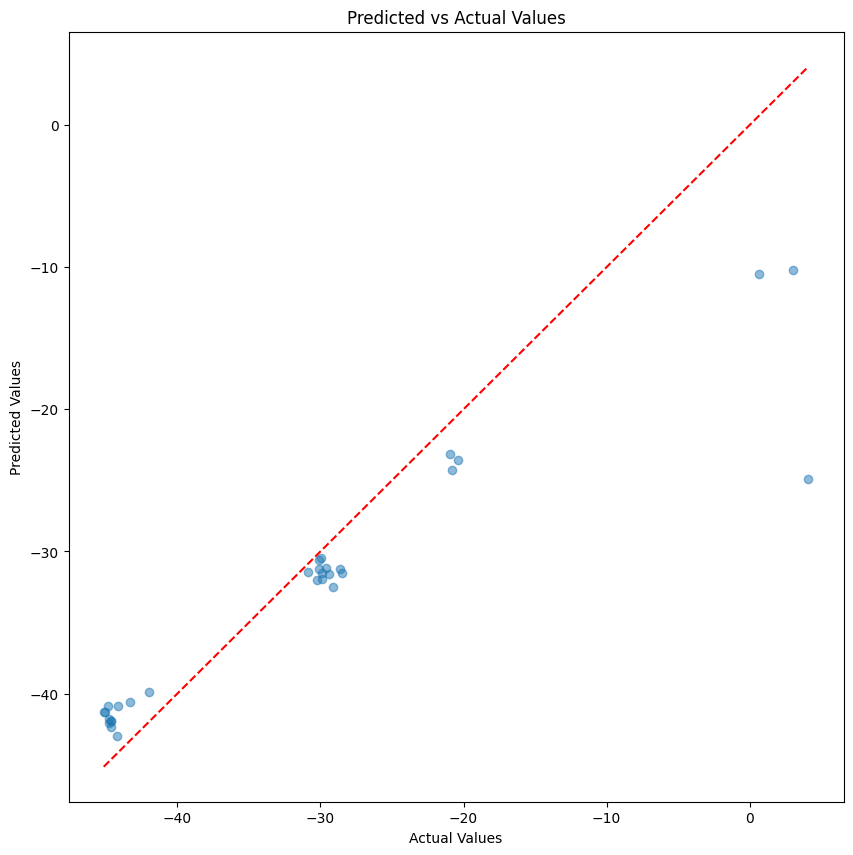

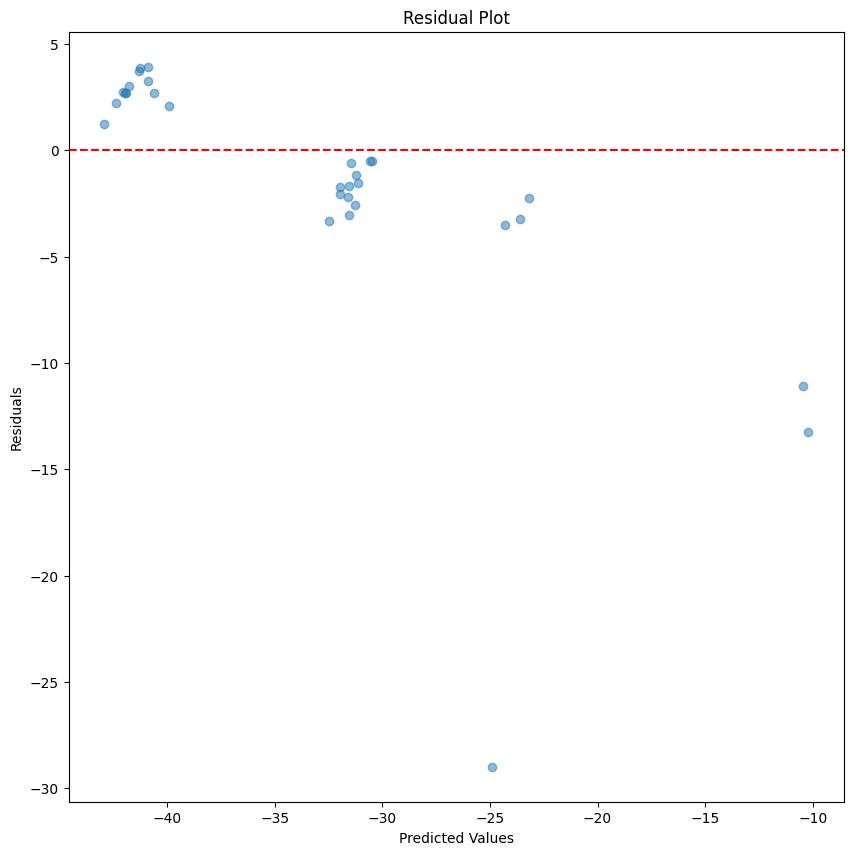

In [13]:


# Visualize results
plt.figure(figsize=(10, 10))
plt.scatter(final_actuals, final_predictions, alpha=0.5)
plt.plot([min(final_actuals), max(final_actuals)], [min(final_actuals), max(final_actuals)], 'r--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Predicted vs Actual Values")
plt.show()

# Plot residuals
plt.figure(figsize=(10, 10))
residuals = final_predictions - final_actuals
plt.scatter(final_predictions, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()